# Practical 10

# Mini Project to predict the housing price using population status in Boston Housing Dataset

## Linear Regression Using Python Scikit learn Hands-on-: Boston Housing Prices Dataset

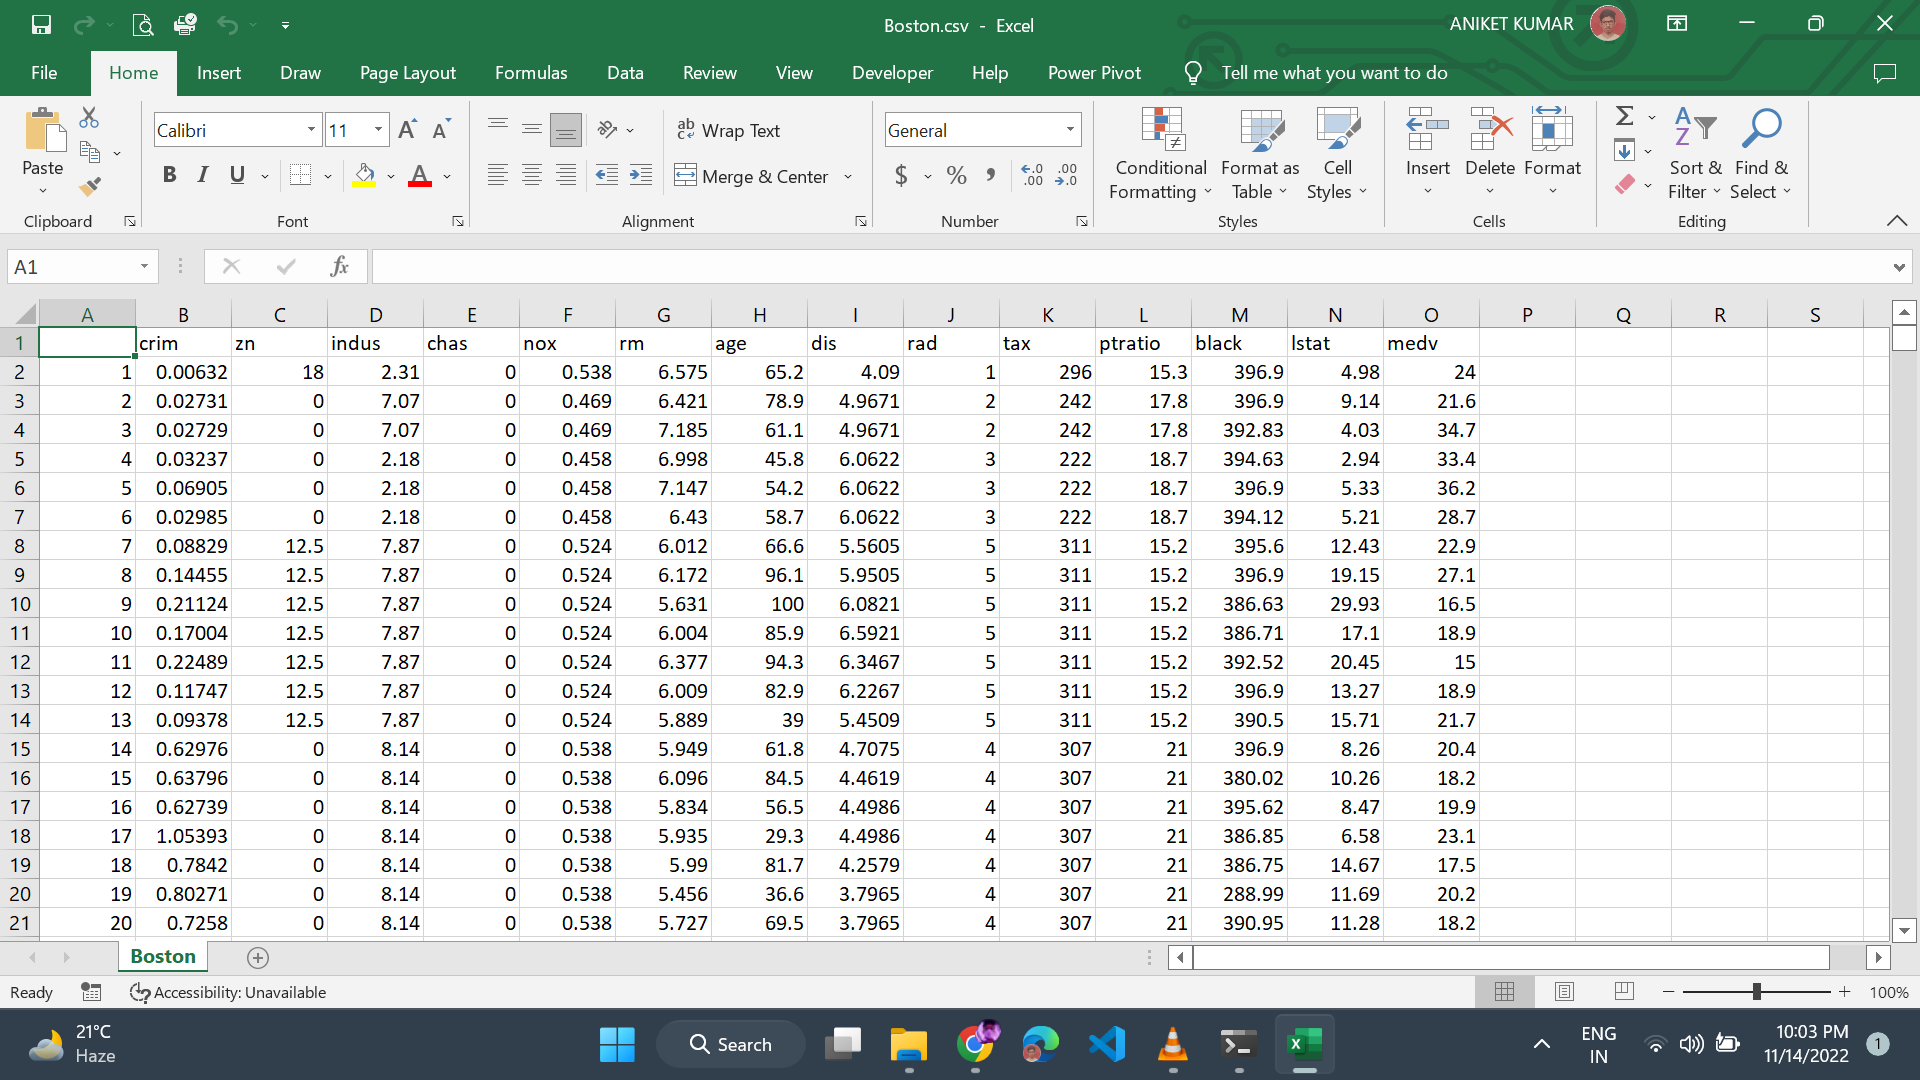

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load the Boston dataset

In [2]:
#Import the dataset
data = pd.read_csv("D:/Machine Learning/Boston.csv")
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
data.columns  #retrieve the column headings

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

### Step 2: Have a glance at the shape

In [4]:
data.shape  #gives the data shape

(506, 15)

In [5]:
data.info()  #Gives the data types and column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [6]:
data.describe()  #Gives the basic arithmetic values of the data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.isnull().sum()  #give the count of null values column vise

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

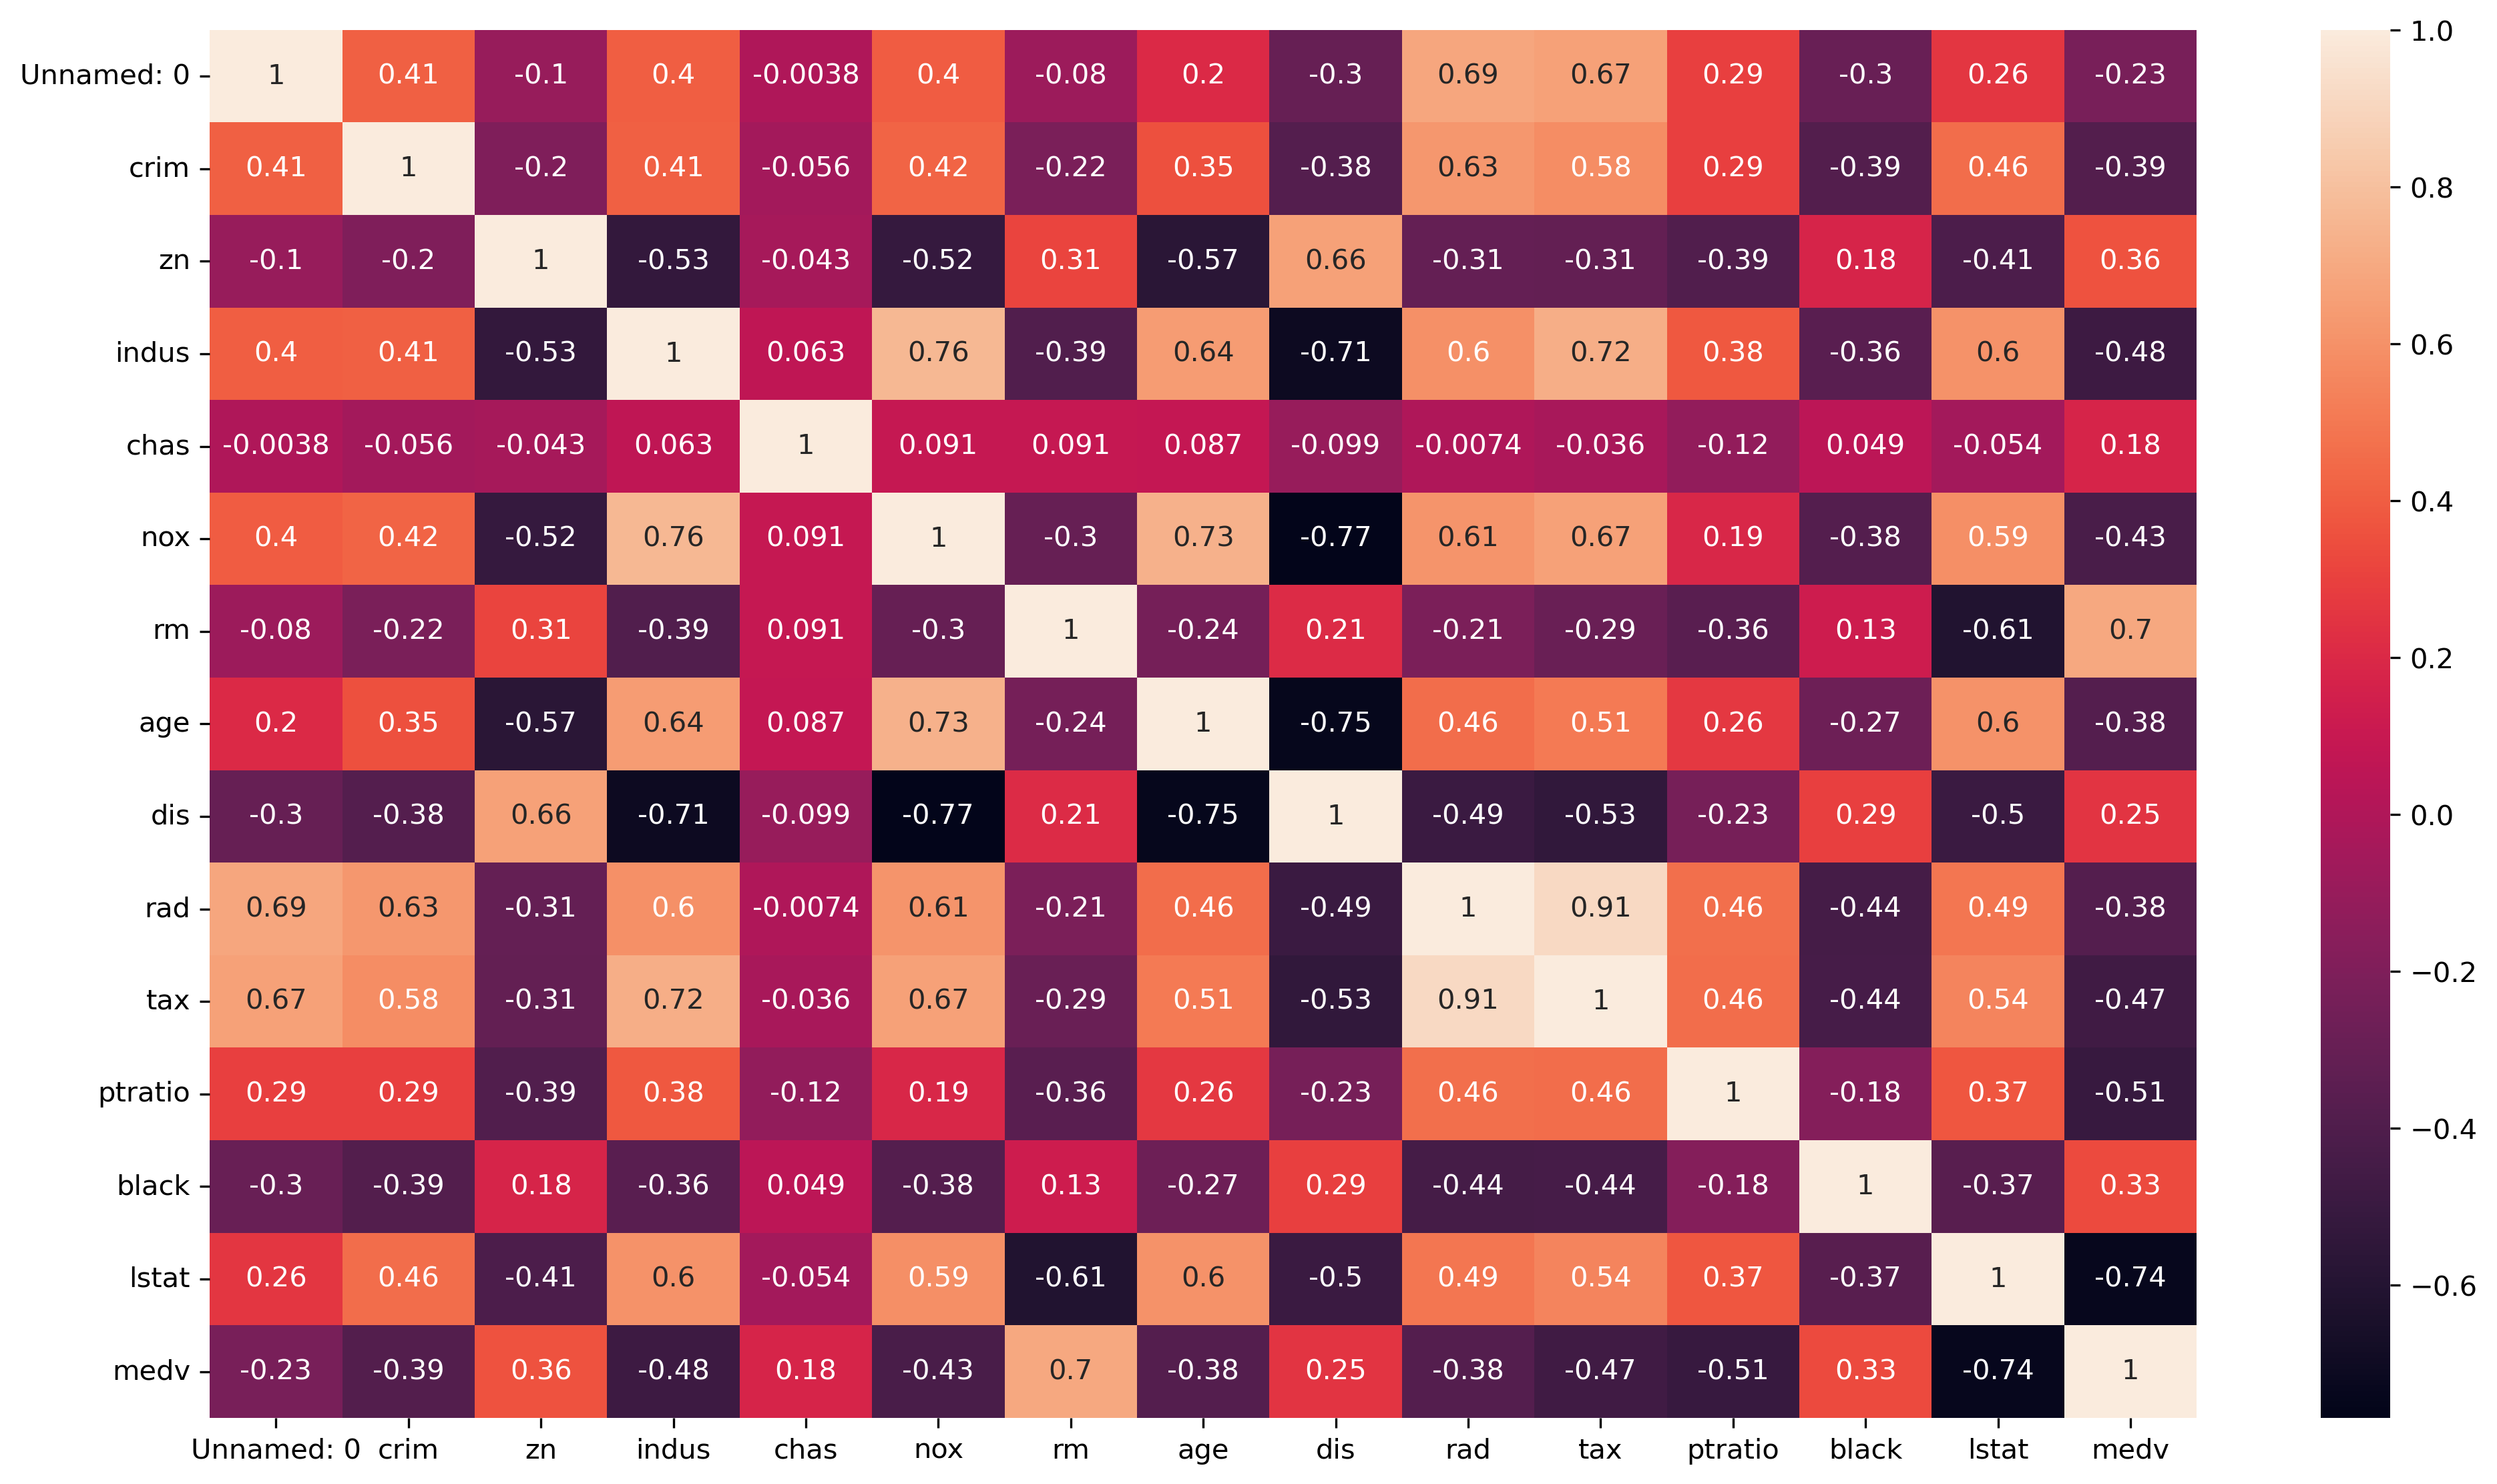

In [8]:
fig = plt.figure(figsize = (16,9) , dpi = 300)
sns.heatmap(data.corr(),annot = True) #pearson correlation
plt.show()

### Step 3: Have a glance at the dependent and independent variables

In [9]:
data = data.loc[: ,['lstat','medv']]  #determine the dependent and independent variables
data.head()  #print the first 5 rows

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


### Step 4: Visualize the change in the variables

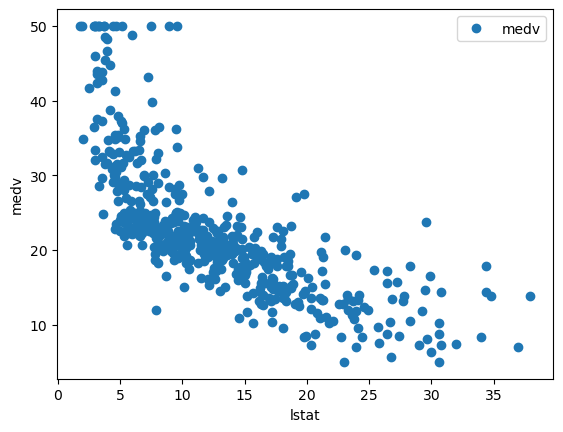

In [10]:
data.plot(x = "lstat",  y = "medv" , style="o")  # Plot the scatterplot
plt.ylabel("medv")
plt.xlabel("lstat")
plt.show()

### Step 5: Divide the data into independent and dependent variables

In [11]:
y = pd.DataFrame(data["medv"])  #crating the dataframe
x = pd.DataFrame(data["lstat"])
print(x,y)

     lstat
0     4.98
1     9.14
2     4.03
3     2.94
4     5.33
..     ...
501   9.67
502   9.08
503   5.64
504   6.48
505   7.88

[506 rows x 1 columns]      medv
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


### Step 6: Split the data into train and test sets

In [12]:
from sklearn.model_selection import train_test_split  #Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### Step 7: Shape of the train and test sets

In [13]:
print(x_train.shape)  # Shape of the train and test sets
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


### Step 8: Train the algorithm

In [14]:
from sklearn.linear_model import LinearRegression  #linar regression and fitting our data
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Step 9: Retrieve the intercept

In [15]:
print(regressor.intercept_)  


[34.33497839]


### Step 10: Retrieve the slope

In [16]:
print(regressor.coef_)  #gives the intercept

[[-0.92441715]]


### Step 11: Predicted value

In [17]:
y_pred = regressor.predict(x_test)
print(y_pred)  #return the predicted value

[[27.37411725]
 [27.69766325]
 [16.95593597]
 [26.84719947]
 [24.91516763]
 [24.05545968]
 [29.99021779]
 [22.28057875]
 [17.76942306]
 [26.1908633 ]
 [27.17998965]
 [30.07341533]
 [21.75366098]
 [24.86894677]
 [23.50080939]
 [23.12179836]
 [12.85152382]
 [30.05492699]
 [27.46655897]
 [ 7.03693995]
 [23.70418116]
 [18.94343284]
 [25.75638724]
 [28.67754543]
 [30.0179503 ]
 [11.7884441 ]
 [15.53233356]
 [24.6008658 ]
 [27.62370988]
 [15.06088081]
 [29.25992824]
 [17.2702378 ]
 [31.672657  ]
 [19.13756044]
 [25.9320265 ]
 [21.77214932]
 [17.88959729]
 [29.40783498]
 [12.75908211]
 [20.48720948]
 [27.54975651]
 [28.09516263]
 [27.30940805]
 [12.05652507]
 [17.66773717]
 [13.3137324 ]
 [32.56009746]
 [19.22075799]
 [25.26644615]
 [24.50842409]
 [23.55627442]
 [23.96301797]
 [29.51876504]
 [24.07394802]
 [ 6.89827738]
 [28.11365097]
 [ 6.6301964 ]
 [28.80696383]
 [20.7737788 ]
 [30.68353065]
 [20.4502328 ]
 [28.2985344 ]
 [15.92058876]
 [18.02825986]
 [ 7.01845161]
 [29.67591595]
 [32.05166

### Step 12: Actual value

In [18]:
y_test  # the actual value of the test data

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


### Step 13: Evaluate the algorithm

In [19]:
print("R Squared: {:.2f}".format(regressor.score(x,y)*100))

R Squared: 54.36


In [20]:
regressor.score(x_test, y_test)*100

52.44757432765152

In [21]:
import sklearn.metrics as metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 5.078127727696937
Mean Squared Error: 46.994820919547124
Root Mean Squared Error: 6.855276866731724
